In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Data1.csv')

In [5]:
df.shape

(647, 23)

In [6]:
df.Teacher.value_counts()

1    328
0    319
Name: Teacher, dtype: int64

In [7]:
#checking for missing data
NAs = pd.concat([df.isnull().sum()], axis =1, keys=['Data'])
NAs[NAs.sum(axis=1)>0]

,Data
Full_Name,430


In [8]:
df.head()

,Full_Name,Age,Gender,Family_type,Family_background,Person_type,Friends,B_nch,Student_type,Relation_teacher,...,Usual_rank,Extra_activities,Presentation,Tours,Remark_8,Remark_10,Remark_Bach,Inspired,Teacher_family,Teacher
0,Ramesh Niraula,Below 30,Male,Small,Middle class,Extrovert,Below 5,Middle rows,Average,3,...,Below 15,5,1,4,0,1,2,No,No,1
1,Vijaya Niroula,Below 30,Female,Small,Middle class,Introvert,Below 5,Last rows,Average,3,...,Below 5,5,3,Above 4,0,0,0,Yes,Yes,1
2,Aishwarya Tandukar,Below 30,Female,Small,Middle class,Introvert,Below 5,Middle rows,Average,3,...,Below 15,3,3,Above 4,1,1,2,Yes,No,1
3,Amrita Bhandari,Below 30,Female,Small,Middle class,Extrovert,Below 5,First rows,Hard worker,5,...,Below 5,5,3,1,1,1,2,Yes,Yes,1
4,Muna dahal,Below 30,Female,Small,Middle class,Extrovert,Below 5,First rows,Hard worker,5,...,Below 5,5,1,1,0,1,2,Yes,No,1


In [9]:
df.drop(['Full_Name'],axis =1, inplace = True)
df.replace({'Below 30': 0,'Below 40': 1,'Below 50': 2,'Below 60': 3,'Female': 0, 'Male': 1, 'Other':2,'Small': 0,'Joint': 1,
           'Low class':0, 'Middle class':1, 'High class':2, 'Introvert':0, 'Extrovert':1, 'Ambivert':2,
            'Below 2':0, 'Below 5':1, 'Below 10':2, 'Below 15':3, 'Above 15':4,
            'First rows':0,'Middle rows':1,'Last rows':2,
           'Hard worker':0, 'Average':1, 'Negligent':2,
            'Above 4':5,
            'Yes':1,'No':0},inplace = True)

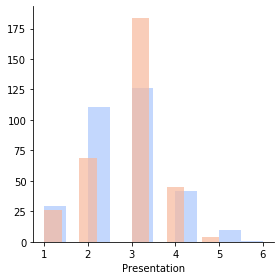

In [10]:
g= sns.FacetGrid(df,hue='Teacher',palette='coolwarm', size=4, aspect=1)
g= g.map(plt.hist, 'Presentation', bins=10, alpha=0.7)

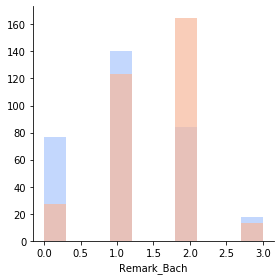

In [11]:
g= sns.FacetGrid(df,hue='Teacher',palette='coolwarm', size=4, aspect=1)
g= g.map(plt.hist, 'Remark_Bach', bins=10, alpha=0.7)

In [12]:
# sns.lmplot(x='Remark_8', y="Usual_rank", data=df, hue='Teacher', fit_reg=False,
#           palette='coolwarm', size=5, aspect=1)

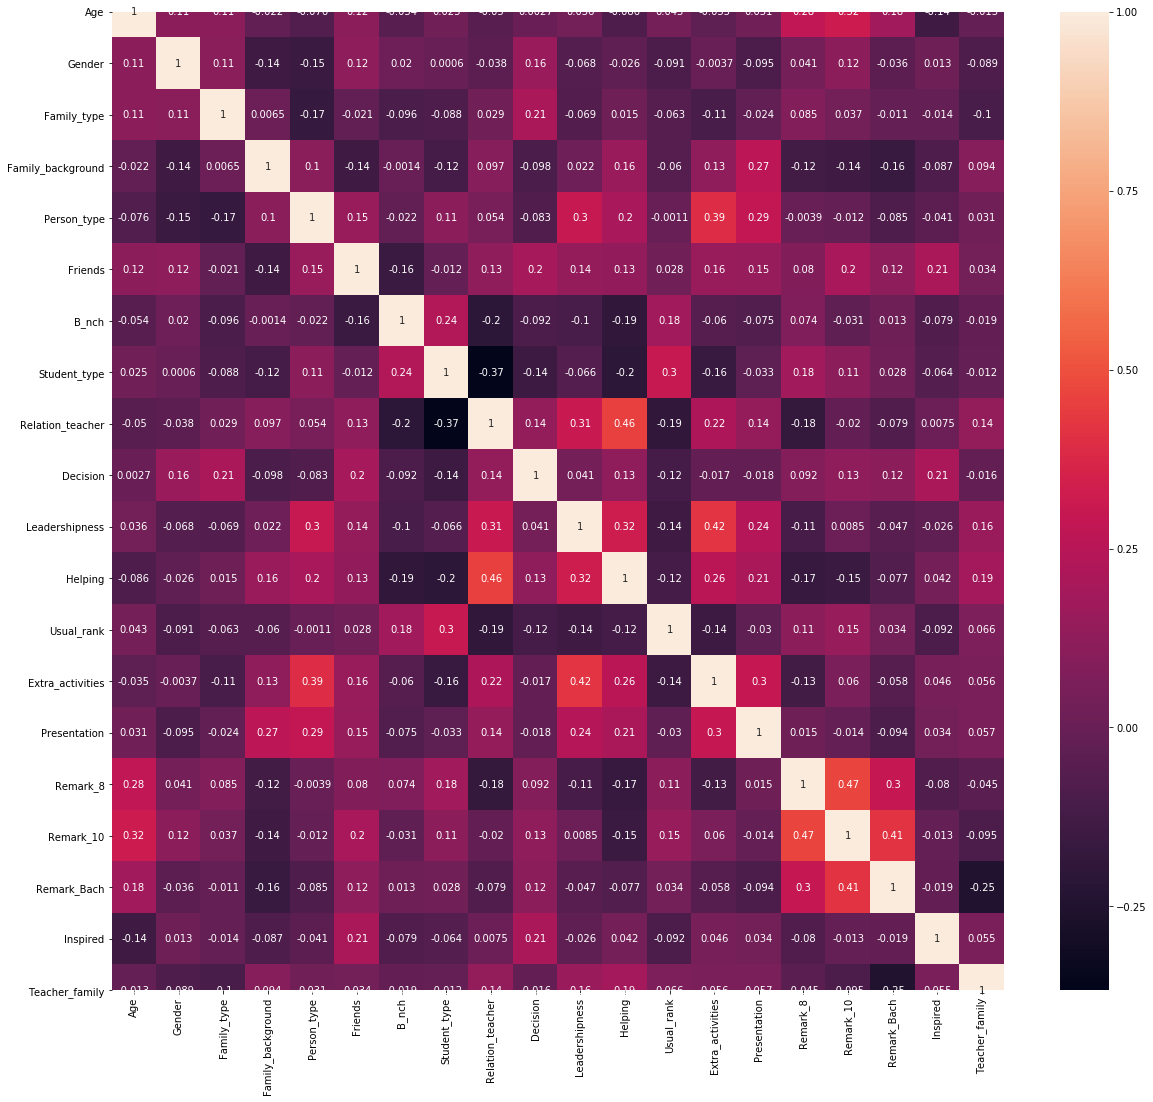

In [13]:
X = df.drop('Teacher', axis = 1)
y = df['Teacher']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

plt.figure(figsize=(20,18))
sns.heatmap(X_train.corr(),annot = True)


In [14]:
def correlation(dataset, threshold):
        col_corr = set()
        corr_matrix = dataset.corr()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    colname = corr_matrix.columns[i]
                    col_corr.add(colname)
        return col_corr

In [17]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

corr_features

set()

In [14]:
data = np.array(df)
X=data[1:, :-1]
y=data[1:, -1]
y=y.astype('int')
X=X.astype('int')
print (X.shape)
print (y.shape)
print(X,y)

(646, 21)
(646,)
[[0 0 0 ... 0 1 1]
 [0 0 0 ... 2 1 0]
 [0 0 0 ... 2 1 1]
 ...
 [0 1 0 ... 2 1 1]
 [0 1 0 ... 1 1 1]
 [0 0 0 ... 2 1 0]] [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

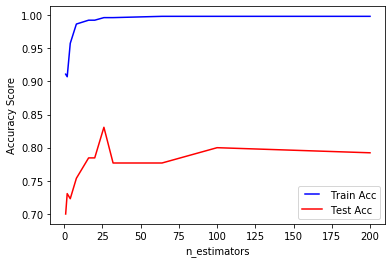

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

n_estimators = [1, 2, 4, 8, 16, 20, 26, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, criterion="gini")
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    train_results.append(accuracy_score(y_train, train_pred))
    
    y_pred = rf.predict(X_test)
    test_results.append(accuracy_score(y_test, y_pred))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train Acc")
line2, = plt.plot(n_estimators, test_results, "r", label="Test Acc")
plt.legend(handler_map= {line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("n_estimators")
plt.show()


In [35]:
rfc = RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=4)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))
print('\n')
print(accuracy_score(y_test, rfc_pred))

[[50 23]
 [12 45]]


              precision    recall  f1-score   support

           0       0.81      0.68      0.74        73
           1       0.66      0.79      0.72        57

    accuracy                           0.73       130
   macro avg       0.73      0.74      0.73       130
weighted avg       0.74      0.73      0.73       130



0.7307692307692307


In [25]:
param_gridl = [ 
    {'penalty': ['l2'],
     'C': np.logspace(-4, 4, 20),
     'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
     'max_iter': [100, 1000, 2500, 5000]
    }
]

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression( )

In [27]:
clf = GridSearchCV(log_reg, param_grid=param_gridl, cv= 3, verbose=True)

In [28]:
best_clf = clf.fit(X,y);

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   17.4s finished


In [325]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [326]:

log_reg = LogisticRegression(  C=0.08858667904100823, max_iter=100,  penalty='l2',
                    solver='sag', tol=0.0001, 
)

log_reg.fit(X_train, y_train)

log_reg_pred = log_reg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, log_reg_pred))
print('\n')
print(classification_report(y_test, log_reg_pred))
print('\n')
print(accuracy_score(y_test, log_reg_pred))

[[44 28]
 [16 45]]


              precision    recall  f1-score   support

           0       0.73      0.61      0.67        72
           1       0.62      0.74      0.67        61

    accuracy                           0.67       133
   macro avg       0.67      0.67      0.67       133
weighted avg       0.68      0.67      0.67       133



0.6691729323308271


In [327]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=7,
)

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))
print('\n')
print(accuracy_score(y_test, dtree_pred))

[[50 22]
 [15 46]]


              precision    recall  f1-score   support

           0       0.77      0.69      0.73        72
           1       0.68      0.75      0.71        61

    accuracy                           0.72       133
   macro avg       0.72      0.72      0.72       133
weighted avg       0.73      0.72      0.72       133



0.7218045112781954


In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1,1,10,100,1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.001]}
grid = GridSearchCV(SVC(), param_grid, verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.523, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.523, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.523, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.657, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.680, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.686, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.674, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.686, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .................... C=1, gamma=0.001, score=0.715, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.744, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.767, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.756, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.791, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [330]:
from sklearn.calibration import CalibratedClassifierCV
svm = SVC(C=100,gamma=0.01)

clf = CalibratedClassifierCV(svm)

clf.fit(X_train,y_train)

svm_pred = clf.predict(X_test)

print(confusion_matrix(y_test, svm_pred))
print('\n')
print(classification_report(y_test, svm_pred))
print('\n')
print(accuracy_score(y_test, svm_pred))

[[50 22]
 [13 48]]


              precision    recall  f1-score   support

           0       0.79      0.69      0.74        72
           1       0.69      0.79      0.73        61

    accuracy                           0.74       133
   macro avg       0.74      0.74      0.74       133
weighted avg       0.74      0.74      0.74       133



0.7368421052631579


In [331]:
pickle.dump(dtree,open('presentdtree.pkl', 'wb'))
pickle.dump(rfc,open('presentrfc.pkl','wb'))
pickle.dump(log_reg,open('presentlogreg.pkl','wb'))
pickle.dump(clf,open('presentsvm.pkl','wb'))

In [516]:
#from sklearn.externals import joblib
#joblib.dump(rfc, 'modelrfc')

In [500]:
#newmod = joblib.load('modelrfc')
#newmod.predict(X_test)

In [501]:
from sklearn.feature_selection import SelectKBest, chi2

In [502]:
select_feature = SelectKBest(chi2, k =5).fit(X_train, y_train)

In [503]:
select_features_df = pd.DataFrame({'Feature':list(X_train.columns), 'Scores':select_feature.scores_})

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [76]:
select_features_df.sort_values(by = 'Scores',ascending = False)

NameError: name 'select_features_df' is not defined

In [77]:
X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)

In [ ]:
X_train.head(5)

In [ ]:
X_train_chi[0:5]

In [ ]:
rfc.fit(X_train_chi,y_train)

In [ ]:
rfc_pred2 = rfc.predict(X_test_chi)

In [ ]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test, rfc_pred2))
#print('\n')
#print(classification_report(y_test, rfc_pred2))
#print('\n')
#print(accuracy_score(y_test, rfc_pred2))